<a href="https://colab.research.google.com/github/aparna993/Capstone-Project/blob/main/COVID_19_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!wget http://cb.lk/covid_19
!unzip covid_19
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"


--2020-11-19 03:15:56--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-11-19 03:15:56--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-11-19 03:15:58--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-11-19 03:15:58--  https://www.dropbox.com/s/raw/7rjw

# **COVID 19 Detector**

In [3]:
#Importing all libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

# **Model**

In [41]:
# Model building using keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy','mse','AUC','Precision','Recall'])

In [42]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 54, 54, 64)       

# **Training and Test Data Generation**

In [43]:
# Data processing for model training

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [44]:
#Training Data 
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),#specified target size
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [45]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [46]:
#Test Data
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [47]:
#Training the model
history = model.fit_generator(
    train_generator,
    # steps_per_epoch=8
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
7/7 [==============================] - 10s 1s/step - loss: 1.0480 - accuracy: 0.5536 - mse: 0.2945 - auc: 0.5673 - precision: 0.5750 - recall: 0.4107 - val_loss: 0.6784 - val_accuracy: 0.6167 - val_mse: 0.2426 - val_auc: 0.9306 - val_precision: 1.0000 - val_recall: 0.2333
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 0.5515 - accuracy: 0.7679 - mse: 0.1849 - auc: 0.8588 - precision: 0.8947 - recall: 0.6071 - val_loss: 0.4239 - val_accuracy: 0.9333 - val_mse: 0.1227 - val_auc: 0.9822 - val_precision: 0.9333 - val_recall: 0.9333
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.4570 - accuracy: 0.7723 - mse: 0.1493 - auc: 0.8681 - precision: 0.7652 - recall: 0.7857 - val_loss: 0.3676 - val_accuracy: 0.9500 - val_mse: 0.0990 - val_auc: 0.9928 - val_precision: 0.9355 - val_recall: 0.9667
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.2890 - accuracy: 0.9018 - mse: 0.0842 - auc: 0.9528 - precision: 0.8947 - recal

# **Results**

dict_keys(['loss', 'accuracy', 'mse', 'auc', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_mse', 'val_auc', 'val_precision', 'val_recall'])


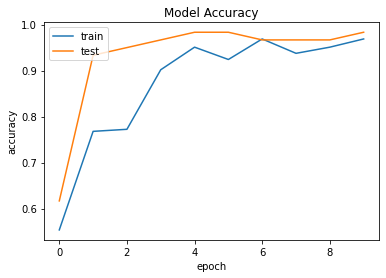

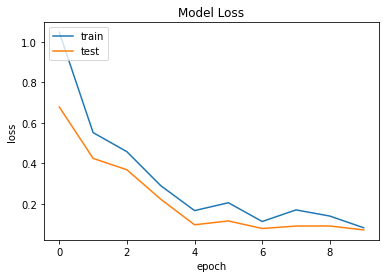

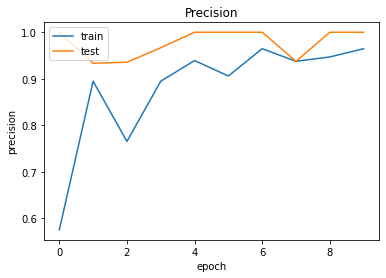

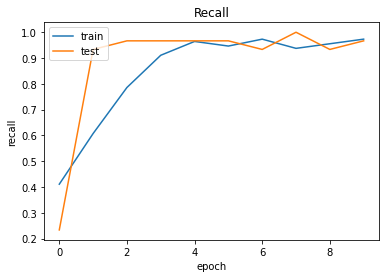

In [48]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for precision
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
def get_class_activation_map(path) :
    
    img_path =  path 
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img,axis=0)
    
    predict = model.predict(img)
    target_class = np.argmax(predict[0])
    # last_conv = model.get_layer('block5_conv3')
    grads =K.gradients(model.output[:,target_class],last_conv.output)[0]
    pooled_grads = K.mean(grads,axis=(0,1,2))
    iterate = K.function([model.input],[pooled_grads,last_conv.output[0]])
    pooled_grads_value,conv_layer_output = iterate([img])
    
    for i in range(512):
        conv_layer_output[:,:,i] *= pooled_grads_value[i]
    
    heatmap = np.mean(conv_layer_output,axis=-1)
    
    for x in range(heatmap.shape[0]):
        for y in range(heatmap.shape[1]):
            heatmap[x,y] = np.max(heatmap[x,y],0)
    heatmap = np.maximum(heatmap,0)
    heatmap /= np.max(heatmap)
    plt.imshow(heatmap)
    img_gray = cv2.cvtColor(img[0], cv2.COLOR_BGR2GRAY)
    upsample = cv2.resize(heatmap, (224,224))
    output_path_gradcam = '/content/CovidDataset' + 'gradcam.jpeg'
    plt.imsave(output_path_gradcam,upsample * img_gray)


In [60]:
def visualize_class_activation_map(model_path, img_path, output_path):
        model = load_model(model_path)
        original_img = cv2.imread(img_path, 1)
        width, height, _ = original_img.shape

        #Reshape to the network input shape (3, w, h).
        img = np.array([np.transpose(np.float32(original_img), (2, 0, 1))])
        
        #Get the 512 input weights to the softmax.
        class_weights = model.layers[-1].get_weights()[0]
        final_conv_layer = get_output_layer(model, "conv5_3")
        get_output = K.function([model.layers[0].input], \
                    [final_conv_layer.output, 
        model.layers[-1].output])
        [conv_outputs, predictions] = get_output([img])
        conv_outputs = conv_outputs[0, :, :, :]

        #Create the class activation map.
        cam = np.zeros(dtype = np.float32, shape = conv_outputs.shape[1:3])
        target_class = 1
        for i, w in enumerate(class_weights[:, target_class]):
                cam += w * conv_outputs[i, :, :]

In [ ]:
visualize_class_activation_map()